In [1]:
import functools
import random
import scipy
import scipy.fftpack
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import Audio
import matplotlib.pyplot as plt

SAMPLE_RATE = 22050

In [2]:
class SingleWave:
    def __init__(self, freq_low, freq_high, freq_step, amp_low, amp_high, amp_step):
        self.freq = freq_low
        self.freq_domain = range(freq_low, freq_high, freq_step)
        self.amp = amp_low
        self.amp_domain = range(amp_low, amp_high, amp_step)
    
    def __eq__(self, rhs):
        return (self.freq == rhs.freq) and (self.freq_domain == rhs.freq_domain) \
               and (self.amp == rhs.amp) and (self.amp_domain == rhs.amp_domain)
    
    def __neq__self(rhs):
        return not self.__eq__(rhs)
    
    def get_frequency(self):
        return self.freq
    def set_frequency(self, new_freq=None):
        changed = False
        if new_freq is None and self.freq_domain:
            self.freq = random.choice(self.freq_domain)
            changed = True
        elif new_freq in self.freq_domain:
            self.freq = new_freq
            changed = True
        return changed
    def get_frequency_domain(self):
        return self.freq_domain

    def get_amplitude(self):
        return self.amp
    def set_amplitude(self, new_amp=None):
        changed = False
        if new_amp is None and self.amp_domain:
            self.amp = random.choice(self.amp_domain)
            changed = True
        elif new_amp in self.amp_domain:
            self.amp = new_amp
            changed = True
        return changed
    def get_amplitude_domain(self):
        return self.amp_domain
    
    def pitch_maker(self, time=1, sr=SAMPLE_RATE):
        t = np.arange(0, time, 1/sr)
        return self.amp * np.sin(2 * np.pi * self.freq * t)

    
class ManyWaves:
    def __init__(self, num_waves, freq_low, freq_high, freq_step, amp_low, amp_high, amp_step):
        self.waves = [
            SingleWave(freq_low, freq_high, freq_step, amp_low, amp_high, amp_step)
            for x in range(num_waves)]
    
    def __eq__(self, rhs):
        return np.allclose(self.pitch_maker(), rhs.pitch_maker())
    
    def __ne__(self, rhs):
        return not self.__eq__(rhs)
    
    def pitch_maker(self, time=1, sr=SAMPLE_RATE):
        return functools.reduce(
            lambda x,y: x+y, [x.pitch_maker(time, sr) for x in self.waves])
    
    def randomize(self):
        for wave in self.waves:
            wave.set_frequency()
            wave.set_amplitude()
    
    def get_single_wave(self, index):
        return self.waves[index]
    
    def get_number_waves(self):
        return len(self.waves)

In [3]:
def plotFreqDomain(freq,sr=22050):
    freq_plot = np.abs(freq)[::10]
    plt.plot(freq_plot)
    num_ticks = 10
    ticks = len(freq_plot)/10*np.arange(10)
    plt.xticks(ticks, sr/len(freq)*ticks*10)
    plt.show()
def plotFreqDomain_zoom(freq,sr=22050):
    freq1 = freq[:1000]
    freq_plot = np.abs(freq1)[::10]
    plt.plot(freq_plot)
    num_ticks = 10
    ticks = len(freq_plot)/10*np.arange(10)
    plt.xticks(ticks, (sr/len(freq)*ticks*10))
    plt.show()
def generate_audio(freq, sr=SAMPLE_RATE):
    return Audio(freq, rate=sr)

In [4]:
USER_LOW_FREQUENCY = 200
USER_HIGH_FREQUENCY = 400
USER_FREQUENCY_STEP = 100

USER_LOW_AMPLITUDE = 1
USER_HIGH_AMPLITUDE = 1
USER_AMPLITUDE_STEP = 1

In [5]:
target = ManyWaves(3, USER_LOW_FREQUENCY, USER_HIGH_FREQUENCY, USER_FREQUENCY_STEP,
                   USER_LOW_AMPLITUDE, USER_HIGH_AMPLITUDE, USER_AMPLITUDE_STEP)
target.randomize()
target_pitch = target.pitch_maker()
generate_audio(target_pitch)

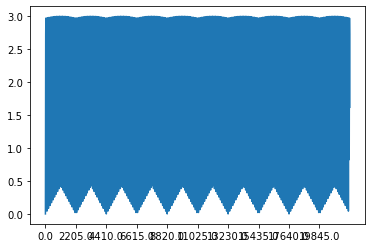

In [6]:
plotFreqDomain(target_pitch)

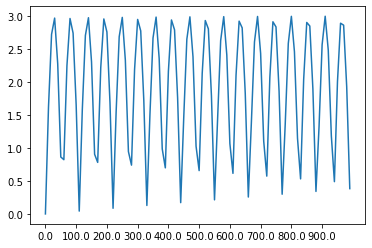

In [7]:
plotFreqDomain_zoom(target_pitch)

In [8]:
user = ManyWaves(3, USER_LOW_FREQUENCY, USER_HIGH_FREQUENCY, USER_FREQUENCY_STEP,
                   USER_LOW_AMPLITUDE, USER_HIGH_AMPLITUDE, USER_AMPLITUDE_STEP)

In [9]:
@interact
def freq_0(frequency=(USER_LOW_FREQUENCY, USER_HIGH_FREQUENCY, USER_FREQUENCY_STEP)):
    user.get_single_wave(0).set_frequency(frequency)

interactive(children=(IntSlider(value=300, description='frequency', max=400, min=200, step=100), Output()), _d…

In [10]:
@interact
def freq_1(frequency=(USER_LOW_FREQUENCY, USER_HIGH_FREQUENCY, USER_FREQUENCY_STEP)):
    user.get_single_wave(1).set_frequency(frequency)

interactive(children=(IntSlider(value=300, description='frequency', max=400, min=200, step=100), Output()), _d…

In [11]:
@interact
def freq_1(frequency=(USER_LOW_FREQUENCY, USER_HIGH_FREQUENCY, USER_FREQUENCY_STEP)):
    user.get_single_wave(1).set_frequency(frequency)

interactive(children=(IntSlider(value=300, description='frequency', max=400, min=200, step=100), Output()), _d…

In [16]:
user_pitch = user.pitch_maker()
generate_audio(user_pitch)

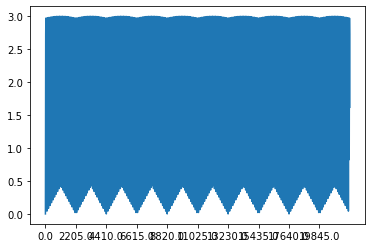

In [17]:
plotFreqDomain(user_pitch)

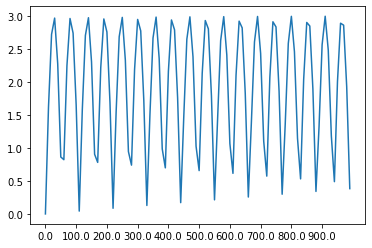

In [18]:
plotFreqDomain_zoom(user_pitch)

In [19]:
if target == user:
    print('You Won!! :)')
else:
    print('Keep Trying!')

You Won!! :)
